In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
customer_feedback = pd.read_csv("cleaned/customer_feedback_cleaned.csv")
customer = pd.read_csv("cleaned/customer_cleaned.csv")
expansion_outcome = pd.read_csv("cleaned/expansion_outcome_cleaned.csv")
product = pd.read_csv("cleaned/product_cleaned.csv")
utilization = pd.read_csv("cleaned/utilization_cleaned.csv")

In [5]:
merged_data = (
    customer
    .merge(customer_feedback, on=["id", "score_date"], how="left")
    .merge(expansion_outcome, on=["id", "score_date"], how="left")
    .merge(product, on=["id", "score_date"], how="left")
    .merge(utilization, on=["id", "score_date"], how="left")
)

In [8]:
merged_data.to_csv("merged_data.csv", index=False)

In [9]:
df=pd.read_csv("merged_data.csv")

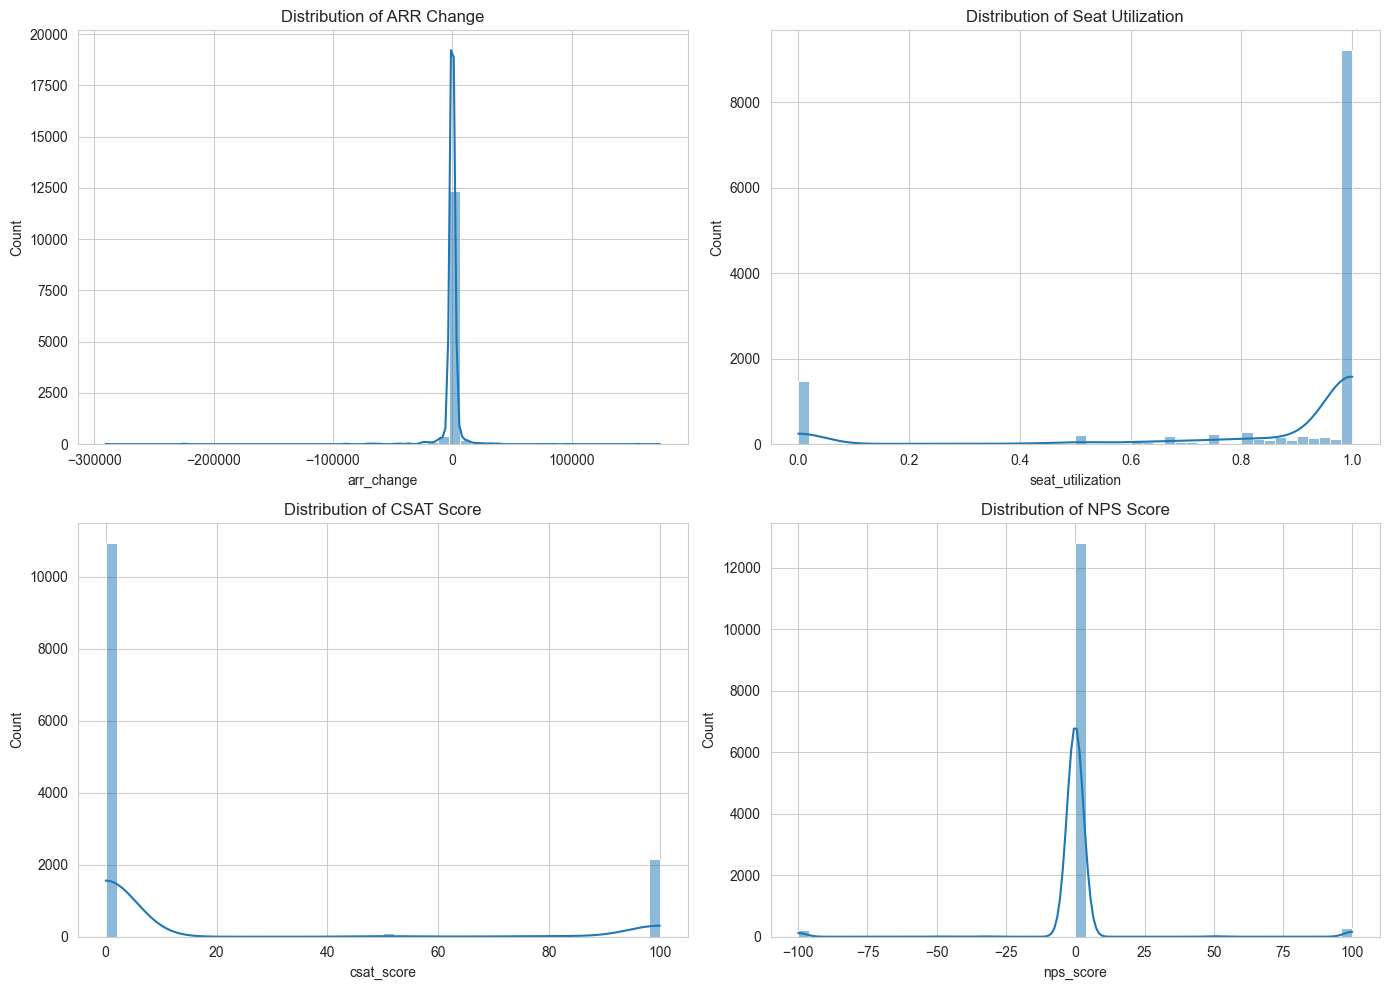

In [10]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df["arr_change"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of ARR Change")

sns.histplot(df["seat_utilization"], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Seat Utilization")

sns.histplot(df["csat_score"], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of CSAT Score")

sns.histplot(df["nps_score"], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of NPS Score")


plt.tight_layout()
plt.show()


## Need to work on hypothesis part and visualisation


===== ARR Change Impacts Churn =====
Missing Values:
 arr_change     0
current_arr    0
future_arr     0
fx_impact      0
dtype: int64

Summary Statistics:
           arr_change    current_arr     future_arr     fx_impact
count   13389.000000   13389.000000   13389.000000  13389.000000
mean     -428.301898    9711.865615    9918.761891    186.996115
std     12699.269375   35500.686061   38948.612379   2154.911237
min   -290511.840000       0.000000       0.000000  -3445.800000
25%         0.000000     348.000000     420.000000      0.000000
50%         0.000000    1548.000000    1668.000000      0.000000
75%         0.000000    6132.000000    5940.000000      0.000000
max    174000.000000  590436.000000  590436.000000  57862.560000

Correlation Matrix:
              arr_change  current_arr  future_arr  fx_impact
arr_change     1.000000    -0.226015    0.055053  -0.224444
current_arr   -0.226015     1.000000    0.859008   0.601611
future_arr     0.055053     0.859008    1.000000   0.50

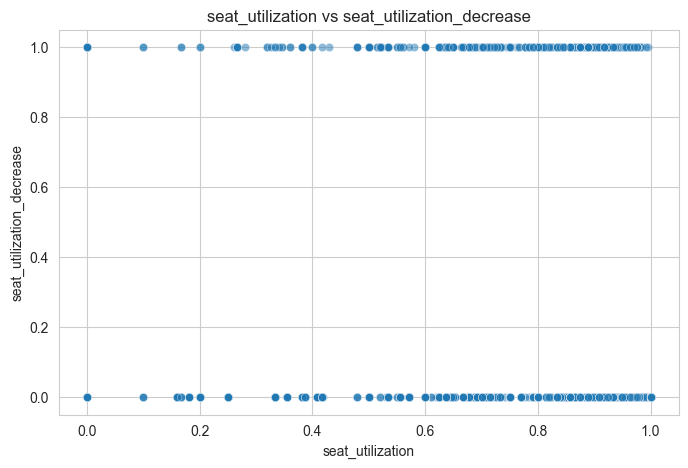


===== Low CSAT Leads to Higher Churn =====
Missing Values:
 csat_score            0
csat_response_rate    0
dtype: int64

Summary Statistics:
          csat_score  csat_response_rate
count  13389.000000        13389.000000
mean      17.529689            7.663156
std       37.475355           19.674352
min        0.000000            0.000000
25%        0.000000            0.000000
50%        0.000000            0.000000
75%        0.000000            0.000000
max      100.000000          100.000000

Correlation Matrix:
                     csat_score  csat_response_rate
csat_score            1.000000            0.750238
csat_response_rate    0.750238            1.000000


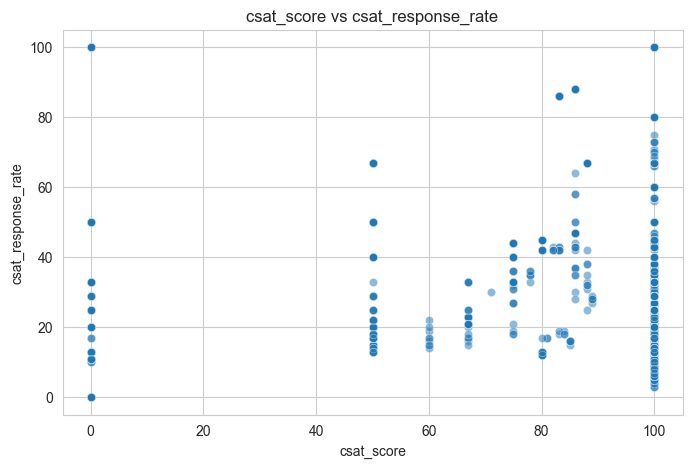


===== Low NPS May Lead to Churn =====
Missing Values:
 nps_score             0
nps_score_all_time    0
avg_nps_rating        0
dtype: int64

Summary Statistics:
           nps_score  nps_score_all_time  avg_nps_rating
count  13389.000000        13389.000000    13389.000000
mean       0.542781            2.272388        0.391575
std       19.928773           29.034661        1.768134
min     -100.000000         -100.000000        0.000000
25%        0.000000            0.000000        0.000000
50%        0.000000            0.000000        0.000000
75%        0.000000            0.000000        0.000000
max      100.000000          100.000000       10.000000

Correlation Matrix:
                     nps_score  nps_score_all_time  avg_nps_rating
nps_score            1.000000            0.657061        0.508718
nps_score_all_time   0.657061            1.000000        0.318443
avg_nps_rating       0.508718            0.318443        1.000000

===== More Billing Issues Increase Churn =====

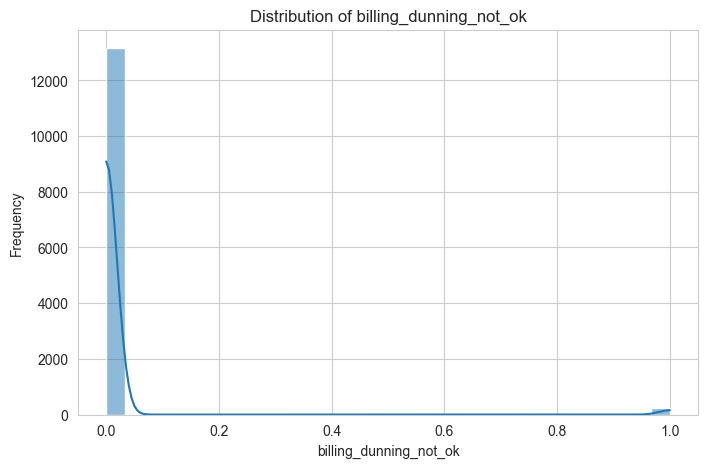


===== More High-Severity Outages Lead to Churn =====
Missing Values:
 months_since_high_sev_outage    0
dtype: int64

Summary Statistics:
        months_since_high_sev_outage
count                  13389.000000
mean                       7.582867
std                        6.520264
min                        0.000000
25%                        1.000000
50%                        6.000000
75%                       12.000000
max                       21.000000


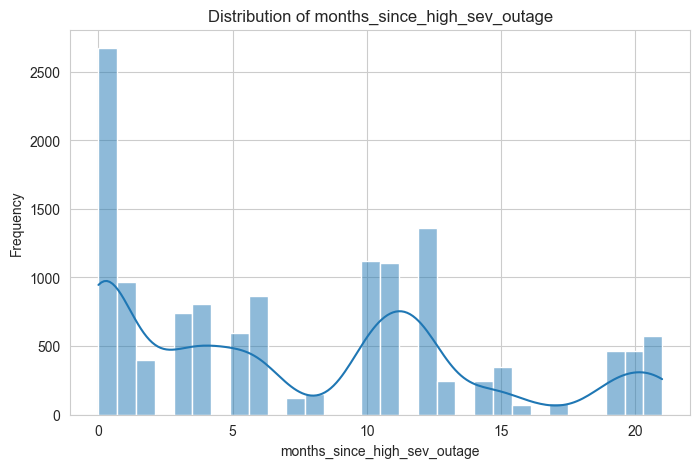


===== Fewer Product Count Leads to Churn =====
Missing Values:
 product_counts    0
dtype: int64

Summary Statistics:
        product_counts
count    13389.000000
mean         3.013070
std          1.776265
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          7.000000


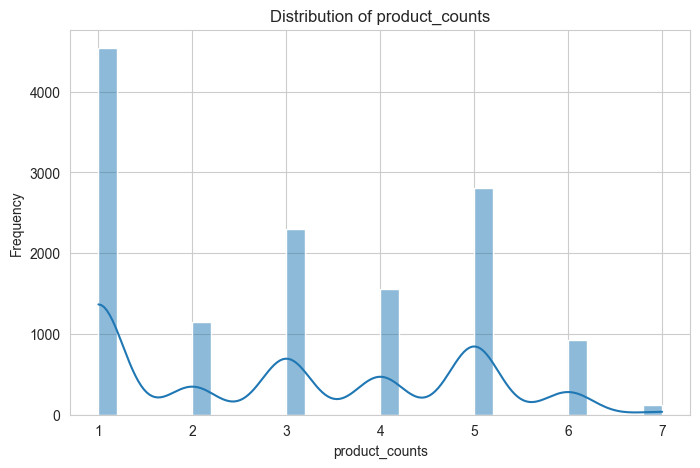


===== Smaller Employee Size Leads to Churn =====
Missing Values:
 crm_employee_range    0
dtype: int64

Summary Statistics:
        crm_employee_range
count               13389
unique                  7
top               Unknown
freq                 9494


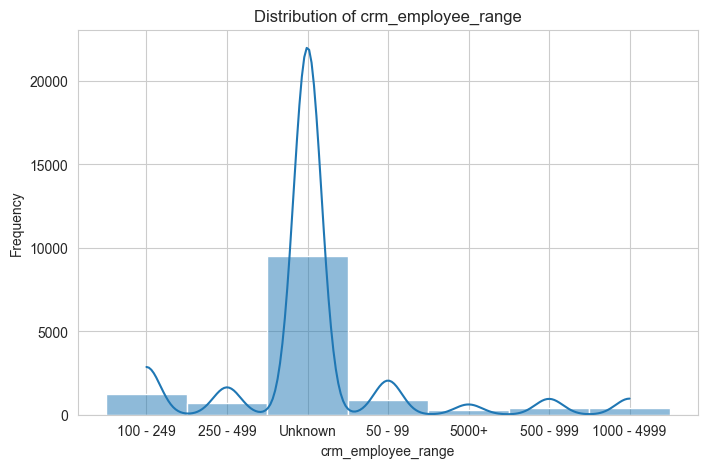


===== Industry Type Impacts Churn =====
Missing Values:
 crm_industry_current    0
dtype: int64

Summary Statistics:
        crm_industry_current
count                 13389
unique                   16
top              Technology
freq                   2926


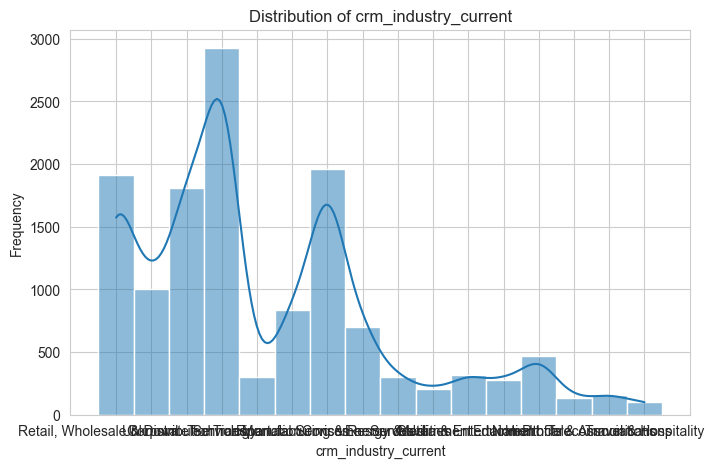


===== More Support Tickets Indicate Future Churn =====
Missing Values:
 num_tickets_deflected    0
max_tickets_per_agent    0
dtype: int64

Summary Statistics:
        num_tickets_deflected  max_tickets_per_agent
count           13389.000000           13389.000000
mean                9.118904             131.678243
std                86.761567            1265.979654
min                 0.000000               0.000000
25%                 0.000000               0.000000
50%                 0.000000               7.000000
75%                 0.000000              59.000000
max              3628.000000          104715.000000

Correlation Matrix:
                        num_tickets_deflected  max_tickets_per_agent
num_tickets_deflected               1.000000               0.107507
max_tickets_per_agent               0.107507               1.000000


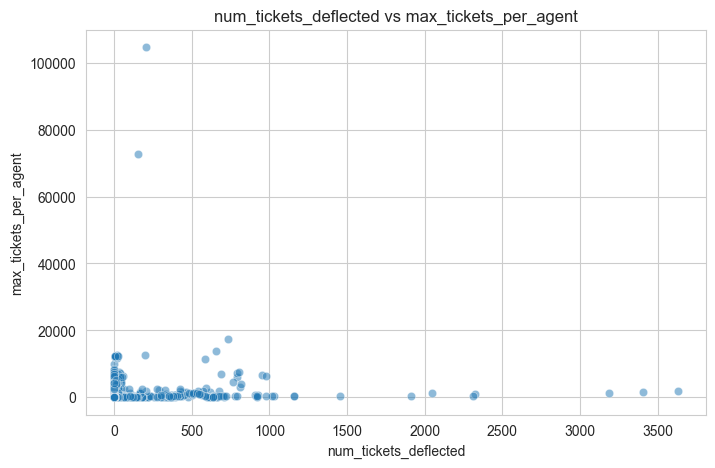

KeyError: 'Column not found: churn_risk'

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with your actual file path

# Define hypotheses and relevant columns
hypotheses = {
    "ARR Change Impacts Churn": ['arr_change', 'current_arr', 'future_arr', 'fx_impact'],
    "Low Seat Utilization Increases Churn": ['seat_utilization', 'seat_utilization_decrease'],
    "Low CSAT Leads to Higher Churn": ['csat_score', 'csat_response_rate'],
    "Low NPS May Lead to Churn": ['nps_score', 'nps_score_all_time', 'avg_nps_rating'],
    "More Billing Issues Increase Churn": ['billing_dunning_not_ok'],
    "More High-Severity Outages Lead to Churn": ['months_since_high_sev_outage'],
    "Fewer Product Count Leads to Churn": ['product_counts'],
    "Smaller Employee Size Leads to Churn": ['crm_employee_range'],
    "Industry Type Impacts Churn": ['crm_industry_current'],
    "More Support Tickets Indicate Future Churn": ['num_tickets_deflected', 'max_tickets_per_agent']
}

# Iterate through hypotheses
for hypothesis, cols in hypotheses.items():
    print(f"\n===== {hypothesis} =====")
    
    # Check for missing values
    missing_values = df[cols].isnull().sum()
    print("Missing Values:\n", missing_values)
    
    # Summary statistics
    summary_stats = df[cols].describe()
    print("\nSummary Statistics:\n", summary_stats)
    
    # Correlation matrix (if applicable)
    if len(cols) > 1:
        correlation_matrix = df[cols].corr()
        print("\nCorrelation Matrix:\n", correlation_matrix)
    
    # Visualization (if applicable)
    if len(cols) == 2:
        plt.figure(figsize=(8,5))
        sns.scatterplot(data=df, x=cols[0], y=cols[1], alpha=0.5)
        plt.title(f"{cols[0]} vs {cols[1]}")
        plt.xlabel(cols[0])
        plt.ylabel(cols[1])
        plt.grid(True)
        plt.show()
    elif len(cols) == 1:
        plt.figure(figsize=(8,5))
        sns.histplot(df[cols[0]], bins=30, kde=True)
        plt.title(f"Distribution of {cols[0]}")
        plt.xlabel(cols[0])
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

# Churn prediction based on months_since_high_sev_outage
# Define threshold (e.g., recent outage < 6 months)
df['recent_outage'] = df['months_since_high_sev_outage'] < 6

# Compare churn rates
churn_rate = df.groupby('recent_outage')['churn_risk'].mean()
print("\nChurn Rate Based on Recent Outages:\n", churn_rate)


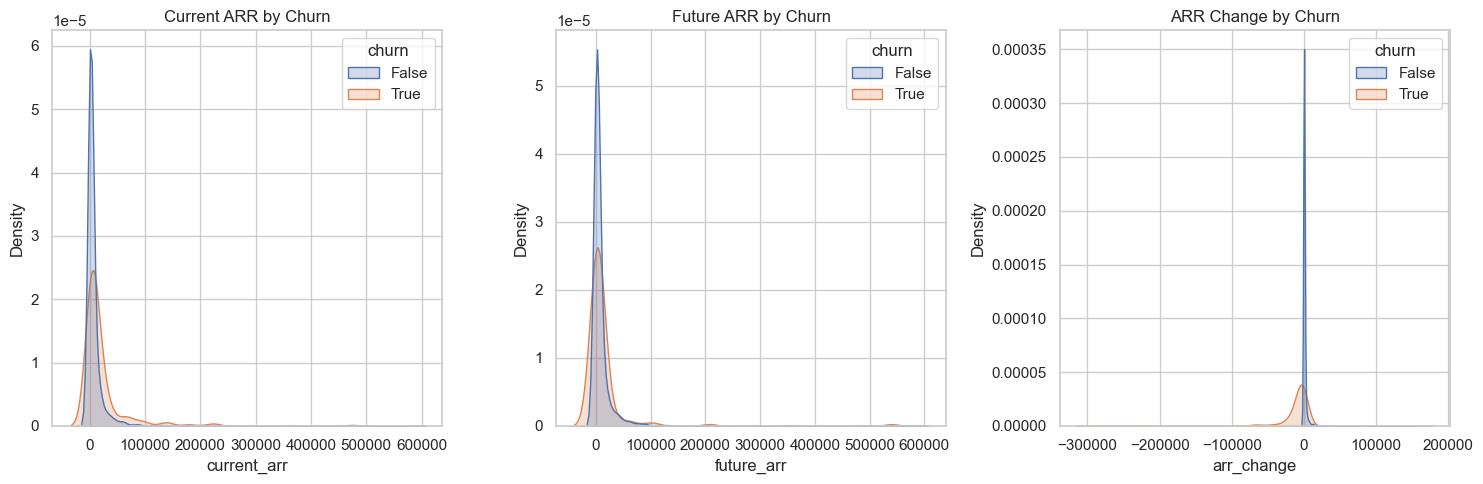

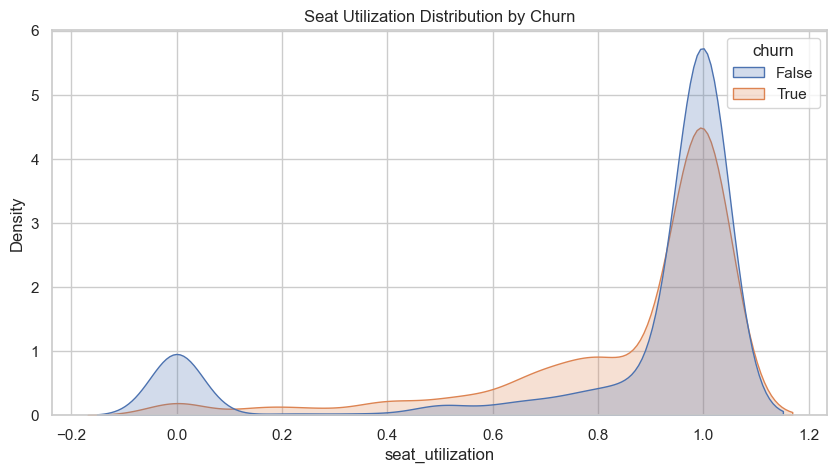

C:\Users\SuryaPrakashK\AppData\Local\Temp\ipykernel_17732\2766171299.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='csat_score', data=data, ci=None)


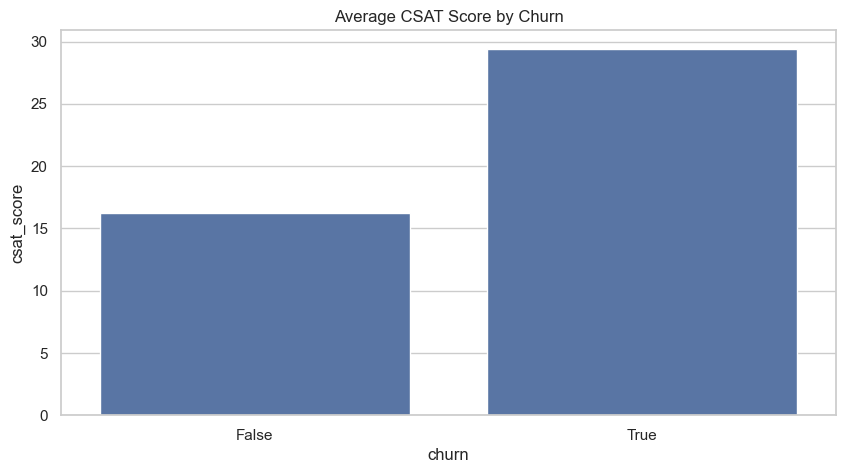

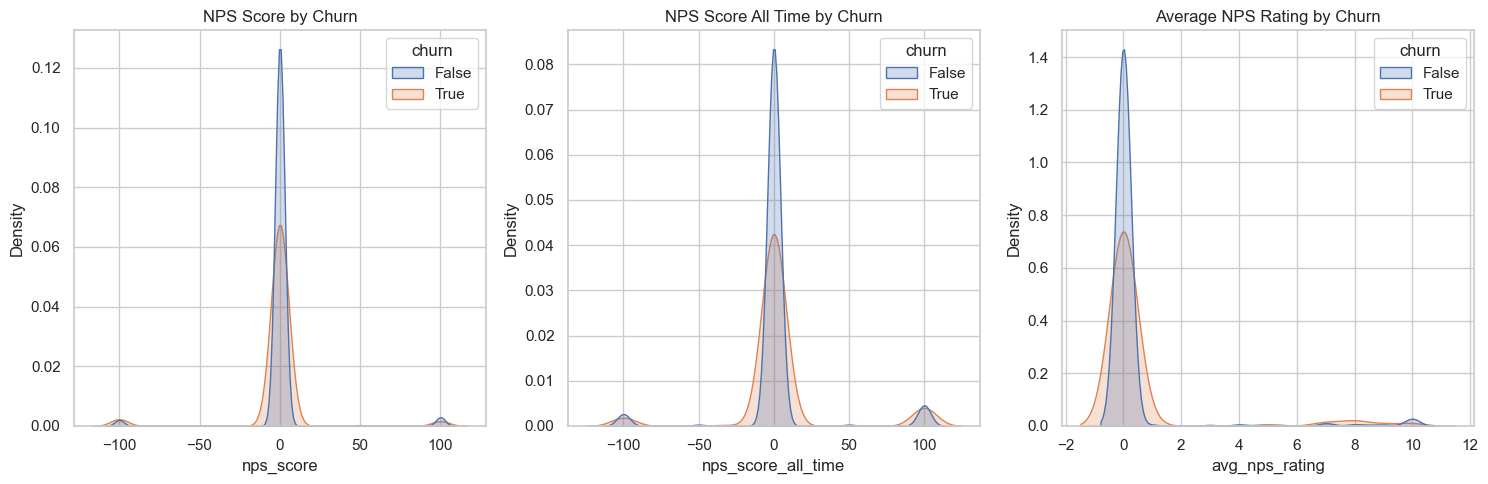

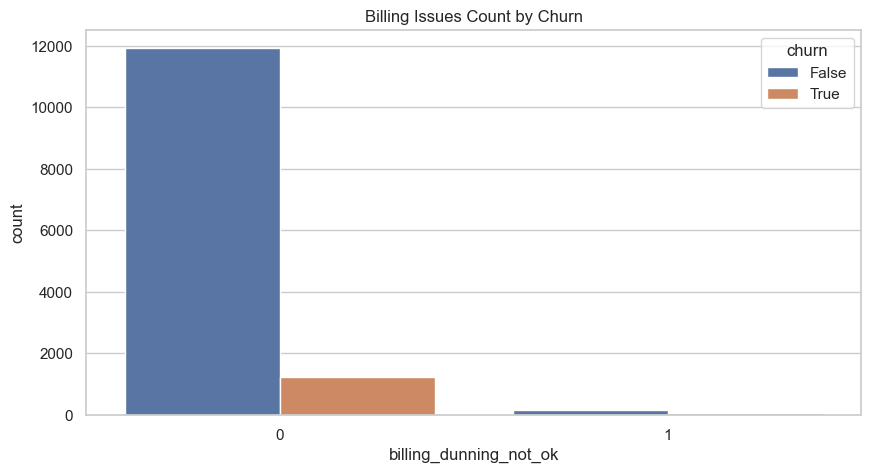

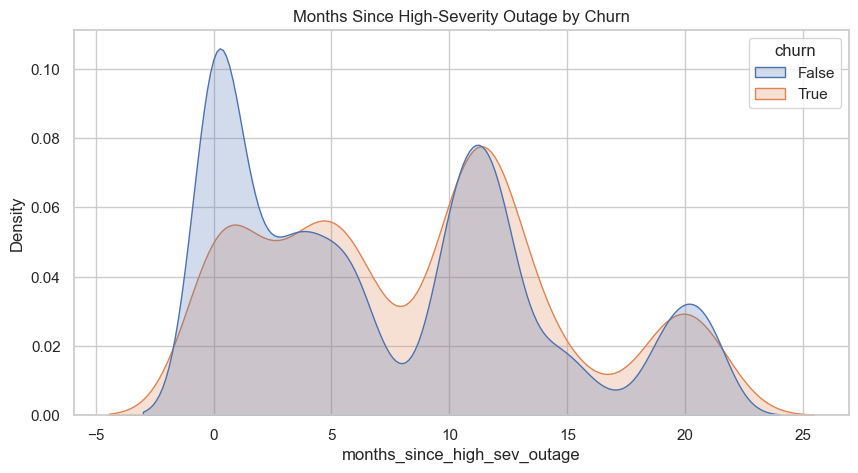

C:\Users\SuryaPrakashK\AppData\Local\Temp\ipykernel_17732\2766171299.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='product_counts', data=data, ci=None)


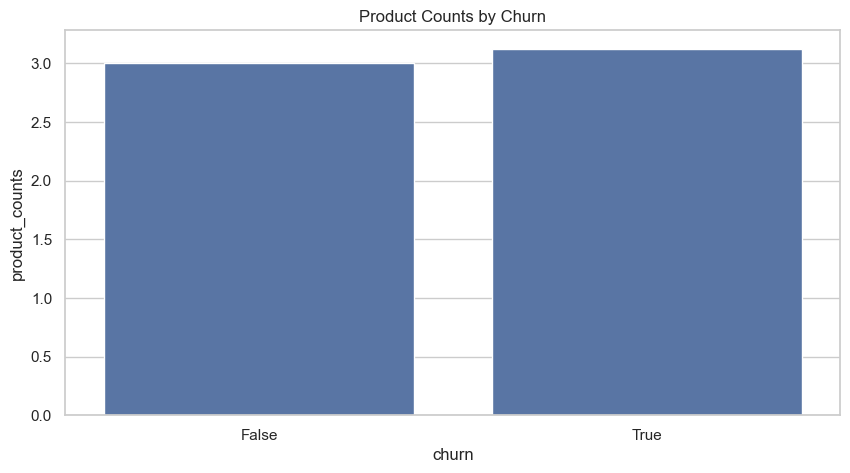

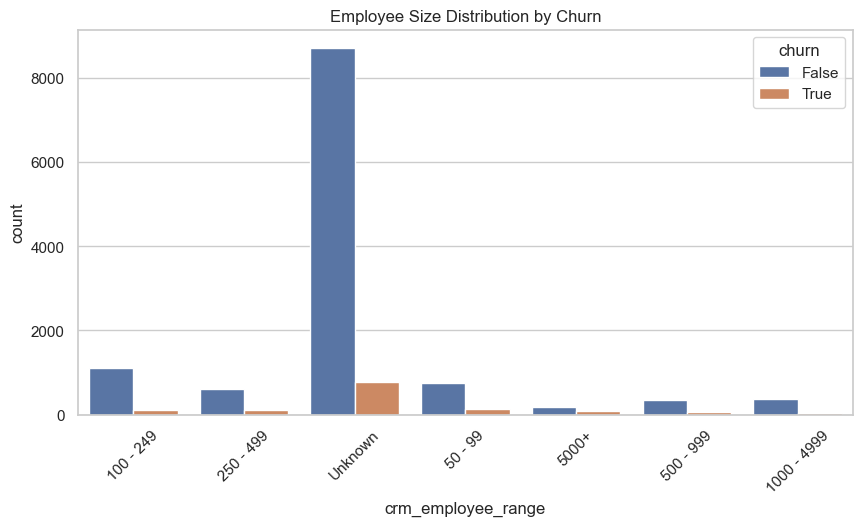

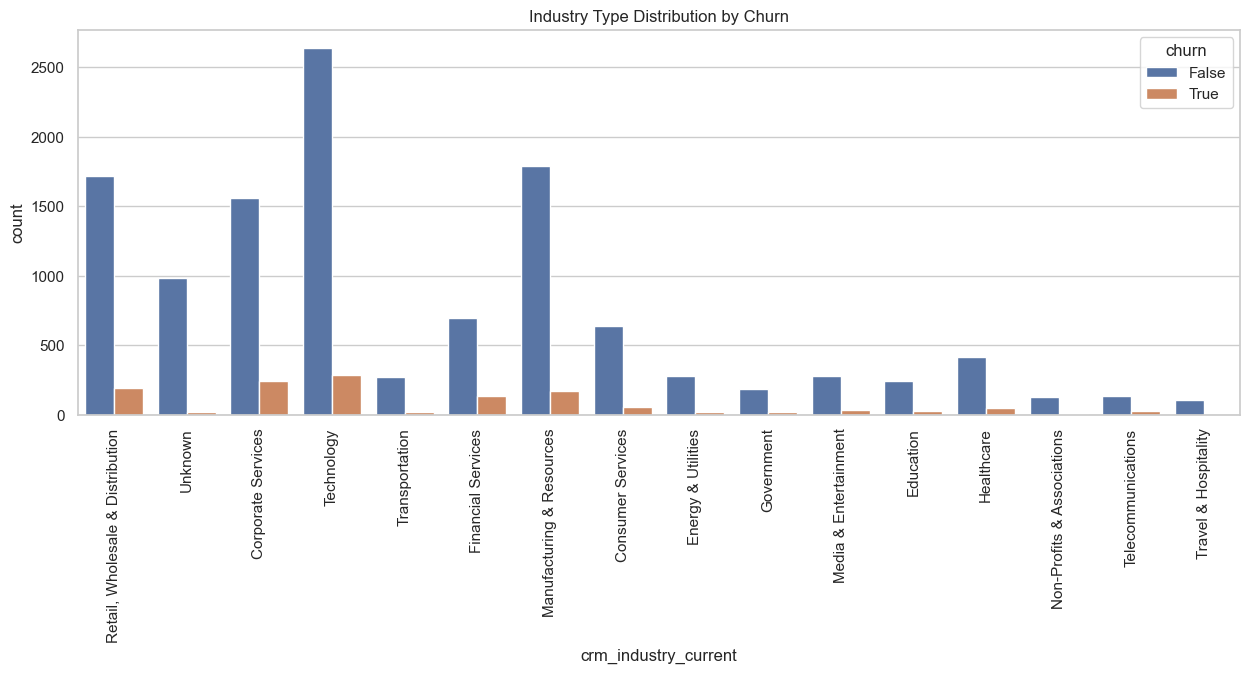

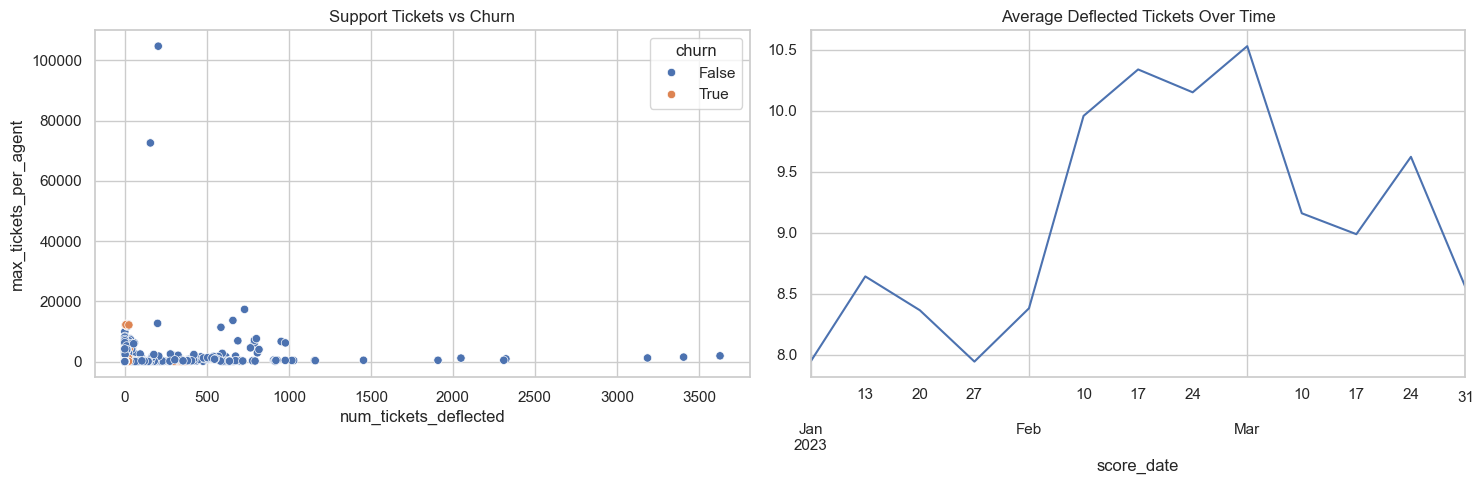

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Define churn column (assuming 'churn' column represents churn status: 1 = churned, 0 = not churned)
# Replace this logic with the actual churn column name or index if needed
data['churn'] = data["arr_change"]<-428  # Adjust based on the actual churn column index or name

# Convert 'score_date' to datetime for proper grouping
data['score_date'] = pd.to_datetime(data['score_date'])

# Set style for seaborn
sns.set(style="whitegrid")

# 1. ARR Change Impacts Churn
plt.figure(figsize=(15, 5))

# Density plot for ARR-related features
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='current_arr', hue='churn', fill=True, common_norm=False)
plt.title('Current ARR by Churn')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='future_arr', hue='churn', fill=True, common_norm=False)
plt.title('Future ARR by Churn')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='arr_change', hue='churn', fill=True, common_norm=False)
plt.title('ARR Change by Churn')

plt.tight_layout()
plt.show()

# 2. Low Seat Utilization Increases Churn
plt.figure(figsize=(10, 5))

# Density plot for seat utilization
sns.kdeplot(data=data, x='seat_utilization', hue='churn', fill=True, common_norm=False)
plt.title('Seat Utilization Distribution by Churn')

plt.show()

# 3. Low CSAT Leads to Higher Churn
plt.figure(figsize=(10, 5))

# Bar chart for average CSAT score
sns.barplot(x='churn', y='csat_score', data=data, ci=None)
plt.title('Average CSAT Score by Churn')

plt.show()

# 4. Low NPS May Lead to Churn
plt.figure(figsize=(15, 5))

# Density plot for NPS-related features
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='nps_score', hue='churn', fill=True, common_norm=False)
plt.title('NPS Score by Churn')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='nps_score_all_time', hue='churn', fill=True, common_norm=False)
plt.title('NPS Score All Time by Churn')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='avg_nps_rating', hue='churn', fill=True, common_norm=False)
plt.title('Average NPS Rating by Churn')

plt.tight_layout()
plt.show()

# 5. More Billing Issues Increase Churn
plt.figure(figsize=(10, 5))

# Count plot for billing issues
sns.countplot(x='billing_dunning_not_ok', hue='churn', data=data)
plt.title('Billing Issues Count by Churn')

plt.show()

# 6. More High-Severity Outages Lead to Churn
plt.figure(figsize=(10, 5))

# Density plot for months since high-severity outage
sns.kdeplot(data=data, x='months_since_high_sev_outage', hue='churn', fill=True, common_norm=False)
plt.title('Months Since High-Severity Outage by Churn')

plt.show()

# 7. Fewer Product Count Leads to Churn
plt.figure(figsize=(10, 5))

# Bar chart for product counts
sns.barplot(x='churn', y='product_counts', data=data, ci=None)
plt.title('Product Counts by Churn')

plt.show()

# 8. Smaller Employee Size Leads to Churn
plt.figure(figsize=(10, 5))

# Bar chart for employee range (categorical variable)
sns.countplot(x='crm_employee_range', hue='churn', data=data)
plt.title('Employee Size Distribution by Churn')
plt.xticks(rotation=45)

plt.show()

# 9. Industry Type Impacts Churn
plt.figure(figsize=(15, 5))

# Count plot for industry type
sns.countplot(x='crm_industry_current', hue='churn', data=data)
plt.title('Industry Type Distribution by Churn')
plt.xticks(rotation=90)

plt.show()

# 10. More Support Tickets Indicate Future Churn
plt.figure(figsize=(15, 5))

# Scatter plot for support tickets
plt.subplot(1, 2, 1)
sns.scatterplot(x='num_tickets_deflected', y='max_tickets_per_agent', hue='churn', data=data)
plt.title('Support Tickets vs Churn')

# Line chart for ticket trends over time
plt.subplot(1, 2, 2)
data.groupby('score_date')['num_tickets_deflected'].mean().plot()
plt.title('Average Deflected Tickets Over Time')

plt.tight_layout()
plt.show()

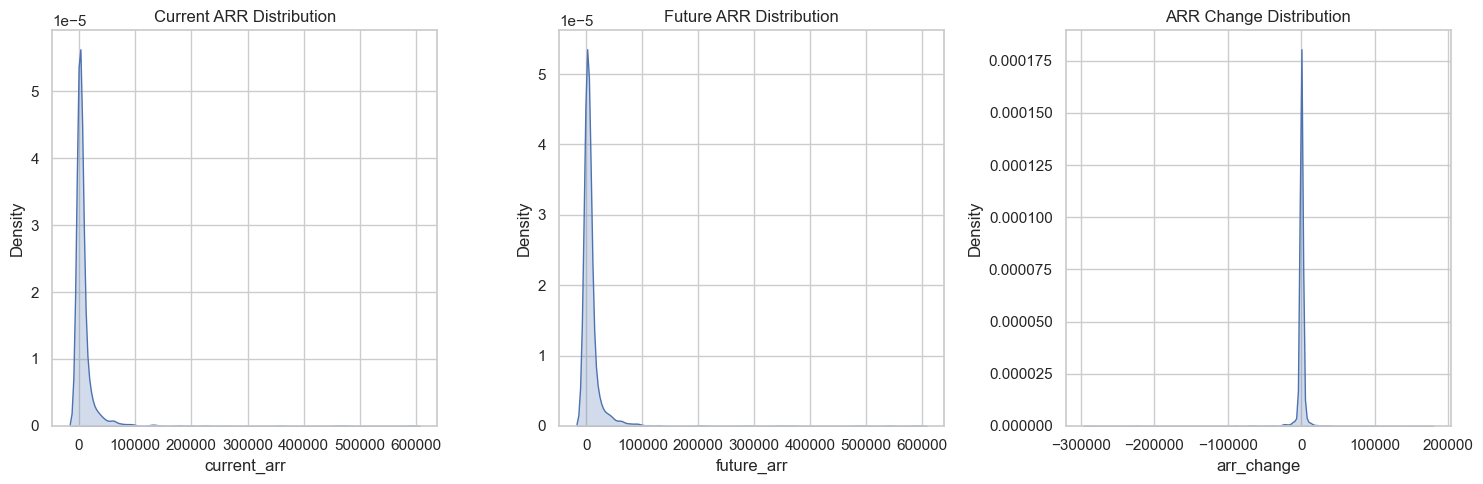

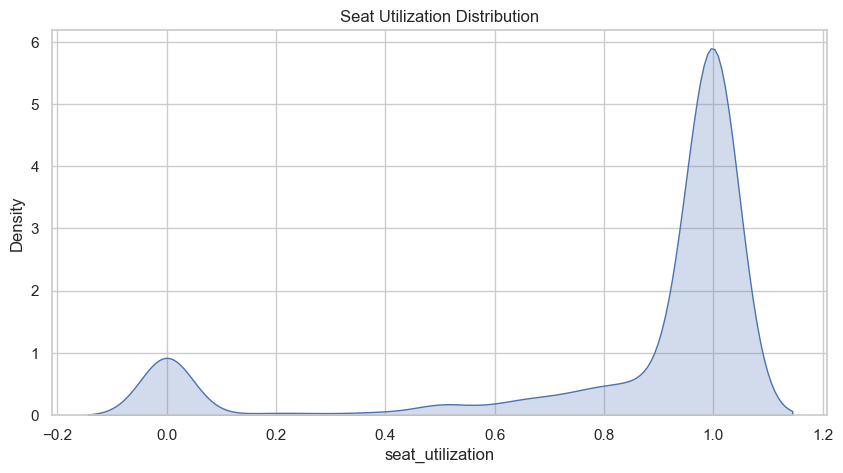

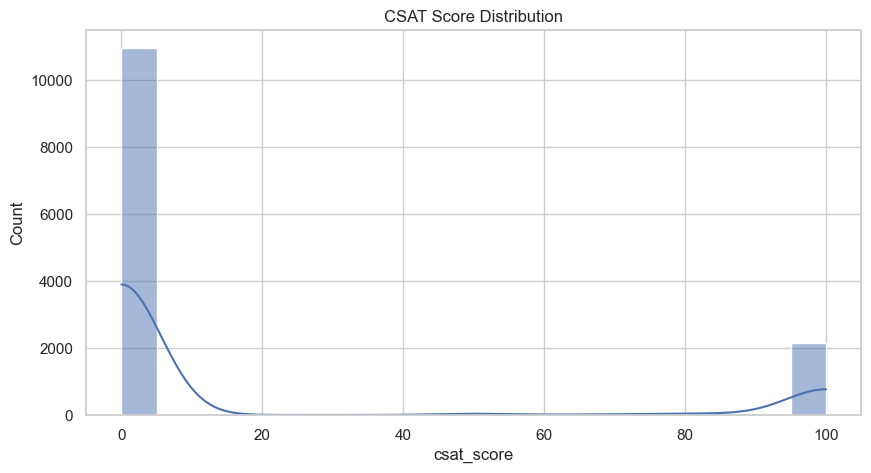

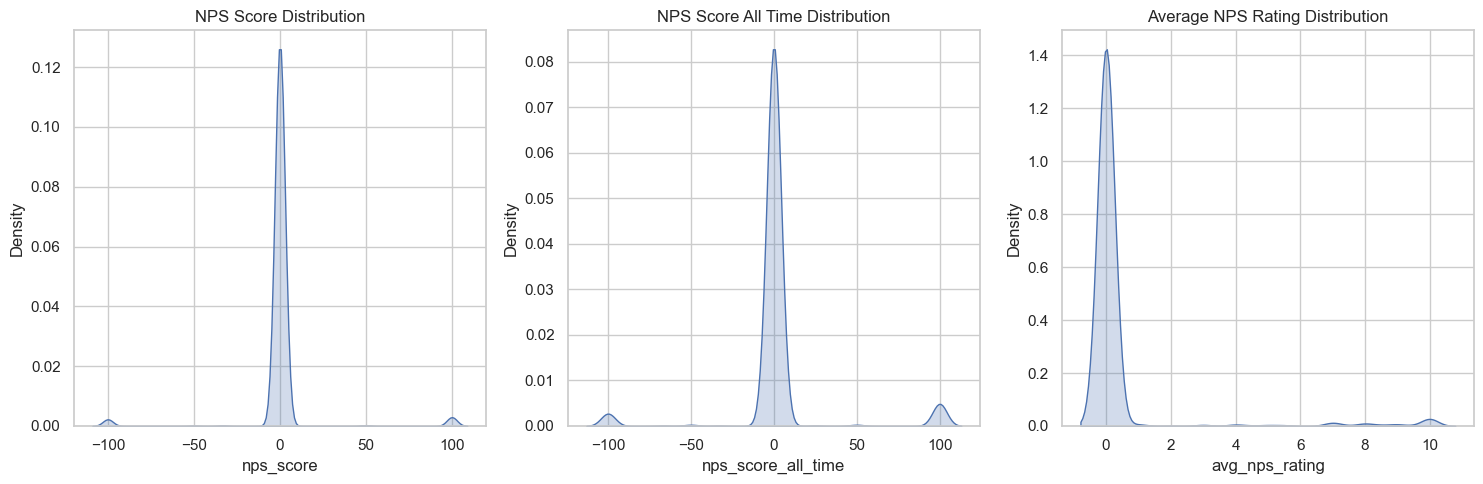

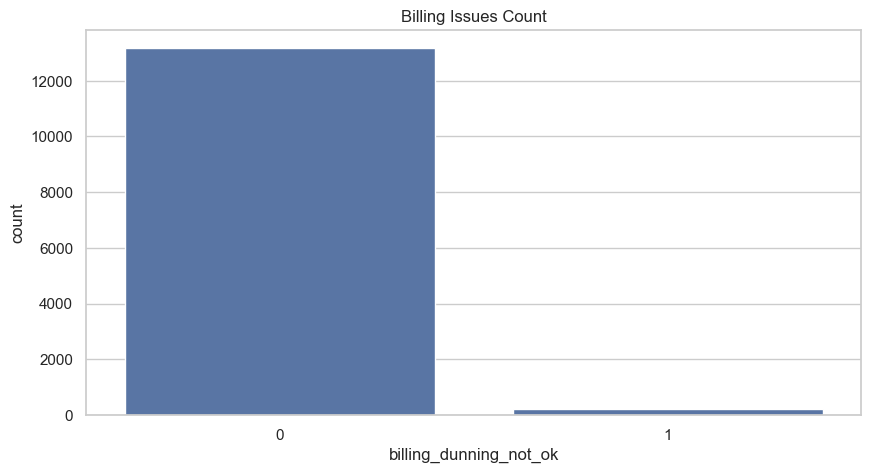

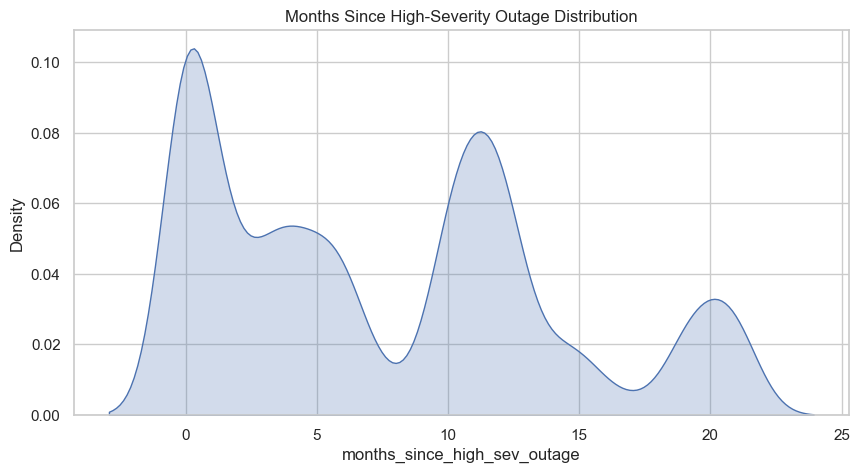

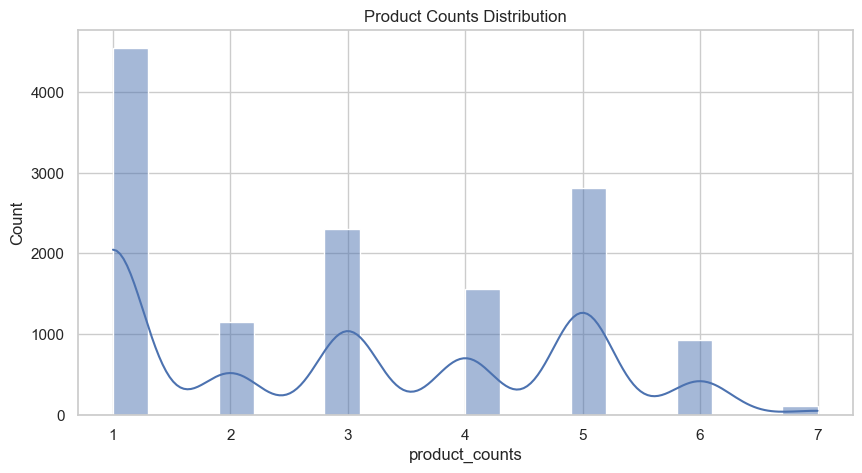

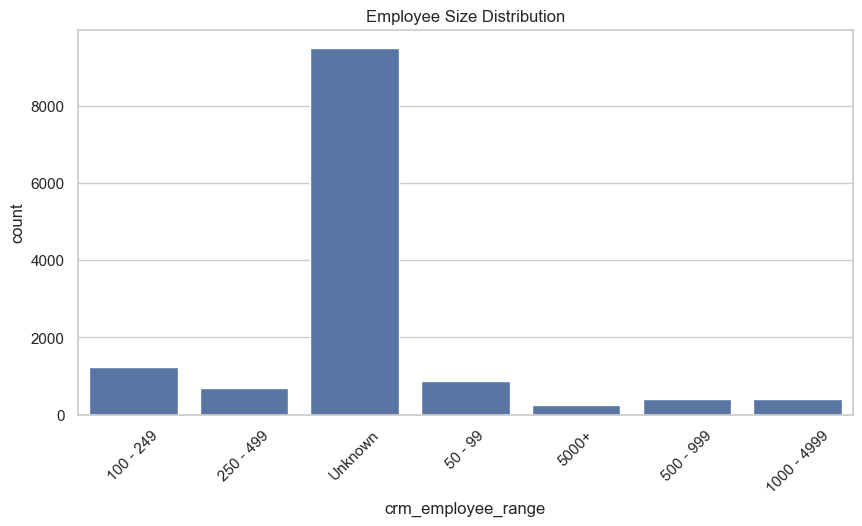

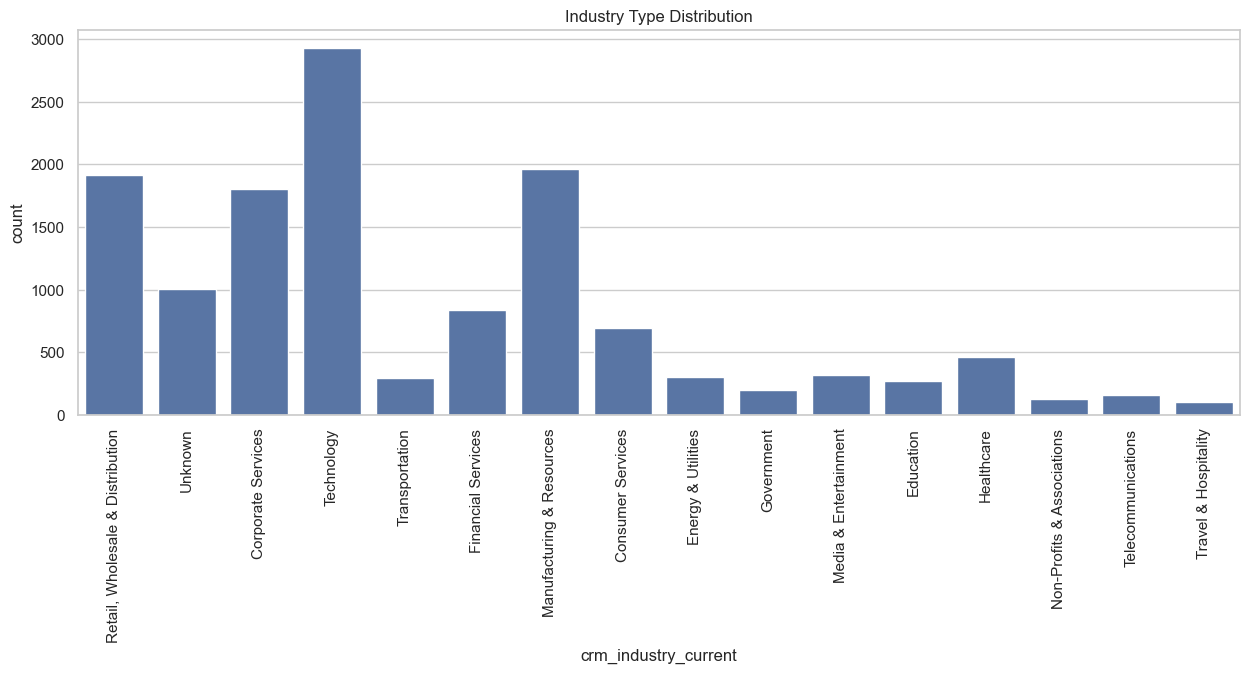

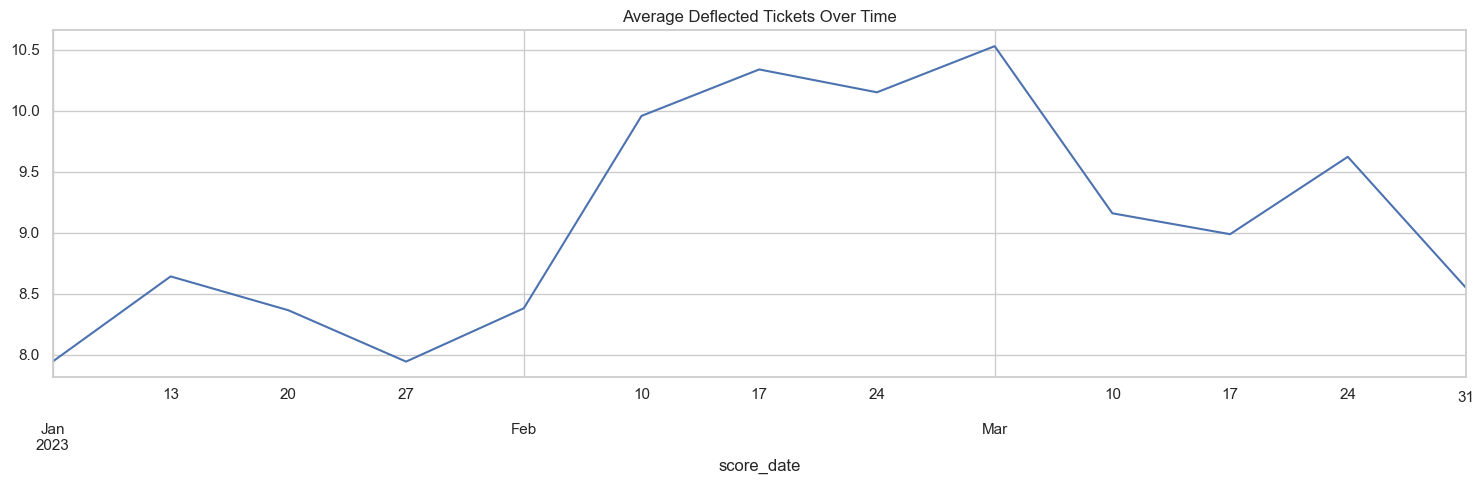

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Convert 'score_date' to datetime for proper grouping
data['score_date'] = pd.to_datetime(data['score_date'])

# Set style for seaborn
sns.set(style="whitegrid")

# 1. ARR Features: Distribution of ARR-related features
plt.figure(figsize=(15, 5))

# Density plot for ARR-related features
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='current_arr', fill=True)
plt.title('Current ARR Distribution')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='future_arr', fill=True)
plt.title('Future ARR Distribution')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='arr_change', fill=True)
plt.title('ARR Change Distribution')

plt.tight_layout()
plt.show()

# 2. Seat Utilization: Distribution of seat utilization
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='seat_utilization', fill=True)
plt.title('Seat Utilization Distribution')
plt.show()

# 3. CSAT Scores: Distribution of CSAT scores
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='csat_score', bins=20, kde=True)
plt.title('CSAT Score Distribution')
plt.show()

# 4. NPS Scores: Distribution of NPS-related features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='nps_score', fill=True)
plt.title('NPS Score Distribution')

plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='nps_score_all_time', fill=True)
plt.title('NPS Score All Time Distribution')

plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='avg_nps_rating', fill=True)
plt.title('Average NPS Rating Distribution')

plt.tight_layout()
plt.show()

# 5. Billing Issues: Count of billing issues
plt.figure(figsize=(10, 5))
sns.countplot(x='billing_dunning_not_ok', data=data)
plt.title('Billing Issues Count')
plt.show()

# 6. High-Severity Outages: Distribution of months since high-severity outage
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='months_since_high_sev_outage', fill=True)
plt.title('Months Since High-Severity Outage Distribution')
plt.show()

# 7. Product Counts: Distribution of product counts
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='product_counts', bins=20, kde=True)
plt.title('Product Counts Distribution')
plt.show()

# 8. Employee Size: Distribution of employee size ranges
plt.figure(figsize=(10, 5))
sns.countplot(x='crm_employee_range', data=data)
plt.title('Employee Size Distribution')
plt.xticks(rotation=45)
plt.show()

# 9. Industry Type: Distribution of industry types
plt.figure(figsize=(15, 5))
sns.countplot(x='crm_industry_current', data=data)
plt.title('Industry Type Distribution')
plt.xticks(rotation=90)
plt.show()

# 10. Support Tickets: Trends of support tickets over time
plt.figure(figsize=(15, 5))

# Line chart for ticket trends over time
data.groupby('score_date')['num_tickets_deflected'].mean().plot()
plt.title('Average Deflected Tickets Over Time')

plt.tight_layout()
plt.show()

In [ ]:
df['churn_risk'] = (df['arr_change'] < 0).astype(int) | (df["seat_utilization"] == 0).astype(int)
df['outage_severity_ratio'] = df['num_high_sev_outages'] / (df['num_low_sev_outages'] + 1)
df['utilization_change'] = df['seat_utilization'] - df['seat_utilization_M_before']
df['tenure_group'] = pd.cut(df['customer_age_quarters'], 
                            bins=[0, 4, 8, 12, 16, 20, np.inf],
                            labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5y+'])